In [1]:

# Step 1: Load the datasets and perform initial data inspection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Check the first few rows of each dataframe
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())

# Check data types and missing values
print(customers_df.info())
print(products_df.info())
print(transactions_df.info())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
# Check for missing values in each dataframe
print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())

# Fill or drop missing values as appropriate (for example, if `Price` or `TotalValue` is missing in transactions)
transactions_df['TotalValue'].fillna(transactions_df['Quantity'] * transactions_df['Price'])

# Drop any rows where critical information is missing
customers_df.dropna(subset=['CustomerID'])


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [5]:
# Descriptive statistics for numeric columns
print(customers_df.describe())
print(products_df.describe())
print(transactions_df.describe())

# Unique values
print(customers_df.nunique())
print(products_df.nunique())
print(transactions_df.nunique())


       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000
CustomerID      200
CustomerName    200
Region            4
SignupDate      179
dtype: int64
ProductID      100
ProductName    

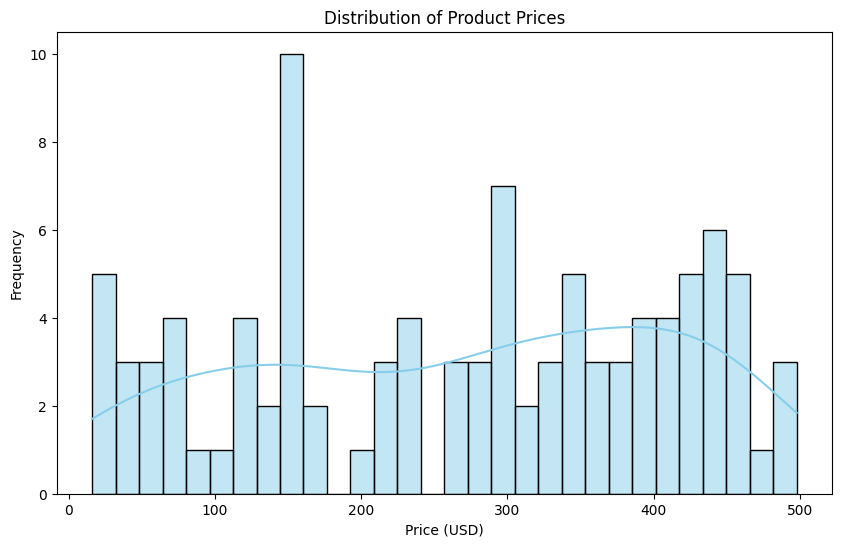

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(products_df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


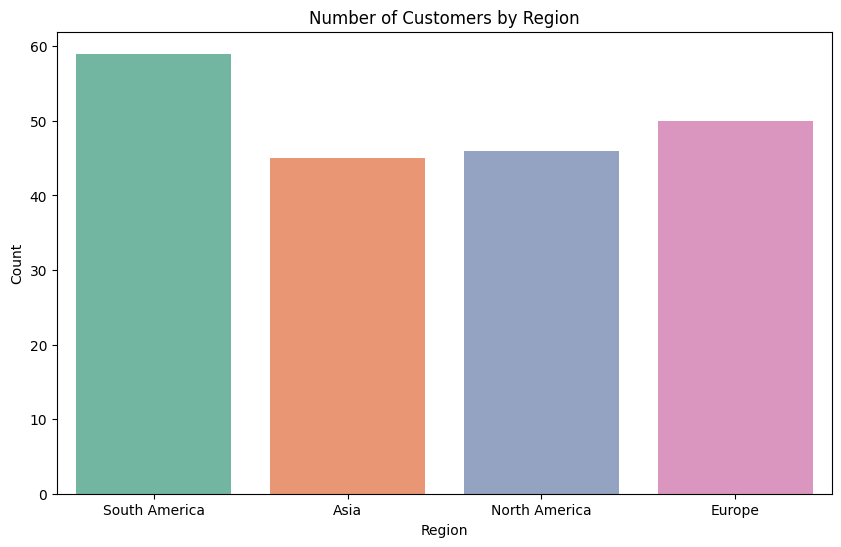

In [10]:
# Sales Distribution by Region

plt.figure(figsize=(10,6))
sns.countplot(x='Region', data=customers_df, palette='Set2', hue = 'Region')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

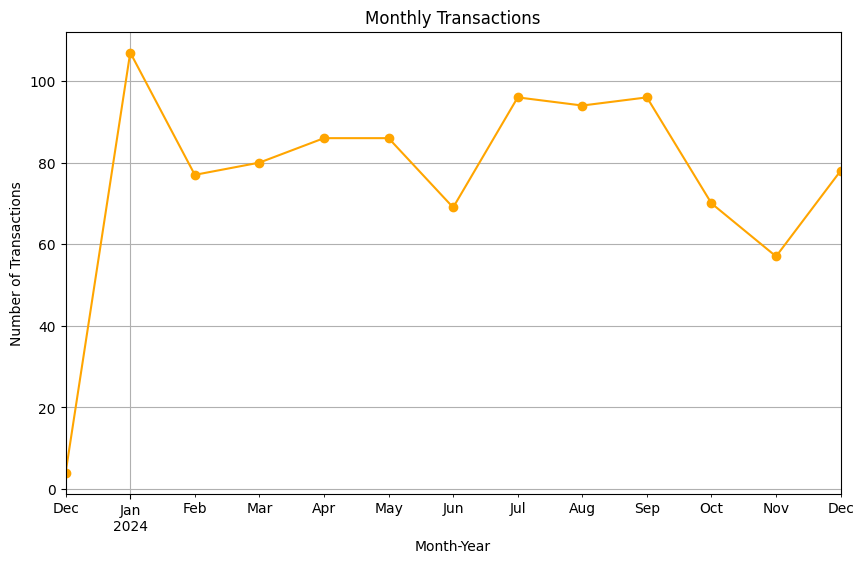

In [11]:
# onthly Distribution of Transactions

# Convert TransactionDate to datetime
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Extract the month and year from the TransactionDate
transactions_df['YearMonth'] = transactions_df['TransactionDate'].dt.to_period('M')

# Plot monthly transaction count
plt.figure(figsize=(10,6))
transactions_df.groupby('YearMonth').size().plot(kind='line', marker='o', color='orange')
plt.title('Monthly Transactions')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

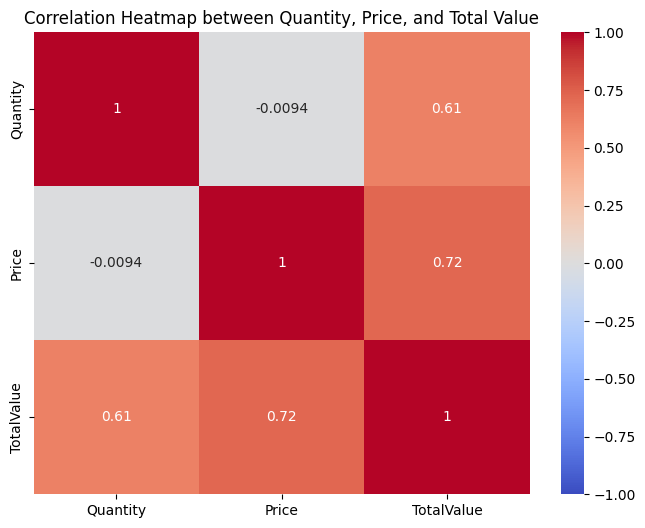

In [12]:



# Step 5: Correlation and Relationships Between Features

# Plot a heatmap of correlations between numerical columns
corr_matrix = transactions_df[['Quantity', 'Price', 'TotalValue']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Quantity, Price, and Total Value')
plt.show()